In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


In [117]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

Чтобы вам было понятнее, ниже показано декодирование одного из отзывов в последовательность слов на английском языке:

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [6]:
for word in decoded_review:
    print(word, end = ' ')

? t h i s f i l m w a s j u s t b r i l l i a n t c a s t i n g l o c a t i o n s c e n e r y s t o r y d i r e c t i o n e v e r y o n e ' s r e a l l y s u i t e d t h e p a r t t h e y p l a y e d a n d y o u c o u l d j u s t i m a g i n e b e i n g t h e r e r o b e r t ? i s a n a m a z i n g a c t o r a n d n o w t h e s a m e b e i n g d i r e c t o r ? f a t h e r c a m e f r o m t h e s a m e s c o t t i s h i s l a n d a s m y s e l f s o i l o v e d t h e f a c t t h e r e w a s a r e a l c o n n e c t i o n w i t h t h i s f i l m t h e w i t t y r e m a r k s t h r o u g h o u t t h e f i l m w e r e g r e a t i t w a s j u s t b r i l l i a n t s o m u c h t h a t i b o u g h t t h e f i l m a s s o o n a s i t w a s r e l e a s e d f o r ? a n d w o u l d r e c o m m e n d i t t o e v e r y o n e t o w a t c h a n d t h e f l y f i s h i n g w a s a m a z i n g r e a l l y c r i e d a t t h e e n d i t w a s s o s a d a n d y o u k n o w w h a t t h e y s a y i f y o u 

In [ ]:
#Кодирование последовательностей целых чисел в бинарную матрицу 

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Функция relu (rectified linear unit — блок линейной ректификации) используется для преобразования отрицательных значений в ноль

В отношении такого стека слоев Dense требуется принять два важных архитектурных решения:  сколько слоев использовать;  сколько скрытых нейронов выбрать для каждого слоя. В главе 4 вы познакомитесь с формальными принципами, помогающими сделать выбор. А пока вам остается только довериться мне в следующем выборе:  два промежуточных слоя с 16 скрытыми нейронами в каждом;  третий слой будет выводить скалярное значение — оценку направленности текущего отзыва.

In [12]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [14]:
#Добавим в optimizer свои настройки
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [15]:
#Использование нестандартных функций потерь и метрик 

from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

Чтобы проконтролировать точность модели во время обучения на данных, которые она прежде не видела, создадим проверочный набор, выбрав 10 000 образцов из оригинального набора обучающих данных

In [16]:
x_val  = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
model.compile(optimizer = 'rmsprop',
             loss  = 'binary_crossentropy',
             metrics = ['acc'])

In [20]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 508us/step - loss: 0.5736 - acc: 0.7275 - val_loss: 0.4814 - val_acc: 0.8195
Epoch 2/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.3922 - acc: 0.8878 - val_loss: 0.3653 - val_acc: 0.8800
Epoch 3/20
15000/15000 [==============================] - 4s 240us/step - loss: 0.2772 - acc: 0.9224 - val_loss: 0.3007 - val_acc: 0.8922
Epoch 4/20
15000/15000 [==============================] - 3s 223us/step - loss: 0.2084 - acc: 0.9409 - val_loss: 0.3031 - val_acc: 0.8817
Epoch 5/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.1679 - acc: 0.9507 - val_loss: 0.2816 - val_acc: 0.8880
Epoch 6/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.1383 - acc: 0.9612 - val_loss: 0.2862 - val_acc: 0.8876
Epoch 7/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.1109 - acc: 0.9699 - val_loss: 0.3168 - 

KeyboardInterrupt: 

Обратите внимание на то, что вызов model.fit() возвращает объект History. Этот объект имеет поле history — словарь с данными обо всем происходившем в процессе обучения. Заглянем в него:

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
#bo - blue dot
#b - solid blue line
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf() #очищение рисунка
acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, acc_values, 'b', label = 'Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Как видите, на этапе обучения потери снижаются с каждой эпохой, а точность растет. Именно такое поведение ожидается от оптимизации градиентным спуском: величина, которую вы пытаетесь минимизировать, должна становиться все меньше с каждой итерацией. Но это не относится к потерям и точности на этапе проверки: похоже, что они достигли пика в четвертую эпоху. Это пример того, о чем мы предупреждали выше: модель, показывающая хорошие результаты на обучающих данных, не обязательно будет показывать такие же хорошие результаты на данных, которые не видела прежде. Выражаясь точнее, в данном случае наблюдается переобучение: после второй эпохи произошла чрезмерная оптимизация на обучающих данных, и в результате получилось представление, характерное для обучающих данных, не обобщающее данные за пределами обучающего набора.

А теперь обучим новую сеть с нуля в течение четырех эпох и затем оценим получившийся результат на контрольных данных

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
x_test

In [ ]:
model.predict(x_test)

 В данном примере использовались два скрытых слоя. Попробуйте использовать один или три и посмотрите, как это повлияет на точность на этапах обучения и проверки. 
 Попробуйте использовать слои с большим или с меньшим количеством скрытых нейронов: 32 нейрона, 64 нейрона и т. д. 
 Попробуйте вместо binary_crossentropy использовать функцию потерь mse. 
 Попробуйте вместо relu использовать функцию активации tanh (она была популярна на заре становления нейронных сетей).

In [ ]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

In [62]:
results

[0.28796734026908877, 0.8831599950790405]

In [63]:
model = models.Sequential()

model.add(layers.Dense(32, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 197us/step - loss: 0.4253 - accuracy: 0.81450s - loss: 0.4394 - accu
Epoch 2/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.2398 - accuracy: 0.9119
Epoch 3/4
25000/25000 [==============================] - 4s 151us/step - loss: 0.1872 - accuracy: 0.9309
Epoch 4/4
25000/25000 [==============================] - 4s 166us/step


In [64]:
results

[0.31625648901462555, 0.8776800036430359]

In [65]:
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 202us/step - loss: 0.4174 - accuracy: 0.8074
Epoch 2/4
25000/25000 [==============================] - 5s 180us/step - loss: 0.2399 - accuracy: 0.9071
Epoch 3/4
25000/25000 [==============================] - 5s 202us/step - loss: 0.1856 - accuracy: 0.9306
Epoch 4/4
25000/25000 [==============================] - 4s 170us/step


In [66]:
results

[0.35543555804252625, 0.8697999715805054]

In [68]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 169us/step - loss: 0.1538 - accuracy: 0.8089
Epoch 2/4
25000/25000 [==============================] - 4s 150us/step - loss: 0.0787 - accuracy: 0.9108
Epoch 3/4
25000/25000 [==============================] - 4s 177us/step - loss: 0.0594 - accuracy: 0.9312
Epoch 4/4
25000/25000 [==============================] - 5s 188us/step


In [69]:
results

[0.08732966682672501, 0.8825200200080872]

In [71]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'tanh', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 154us/step - loss: 0.1362 - accuracy: 0.8286
Epoch 2/4
25000/25000 [==============================] - 4s 147us/step - loss: 0.0698 - accuracy: 0.9143
Epoch 3/4
25000/25000 [==============================] - 4s 155us/step - loss: 0.0513 - accuracy: 0.9356
Epoch 4/4
25000/25000 [==============================] - 5s 195us/step


In [73]:
results

[0.09742999367892742, 0.8723599910736084]

In [19]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 7s 279us/step - loss: 0.4488 - accuracy: 0.8210
Epoch 2/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.2562 - accuracy: 0.9102
Epoch 3/4
25000/25000 [==============================] - 3s 126us/step - loss: 0.1955 - accuracy: 0.9308
Epoch 4/4
25000/25000 [==============================] - 6s 243us/step


In [20]:
history_val = history.history

In [21]:
history_val.keys()

dict_keys(['loss', 'accuracy'])

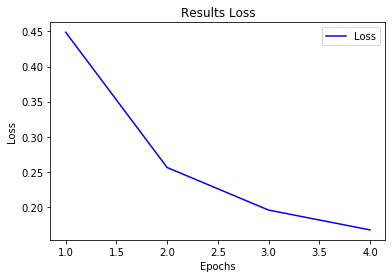

In [22]:
#Ошибка с каждой эпохой уменьшается
import matplotlib.pyplot as plt

loss = history_val['loss']
acc = history_val['accuracy']

epochs = range(1, len(acc) + 1)

plt.clf()
plt.plot(epochs, loss, 'b', label = 'Loss')
plt.title('Results Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

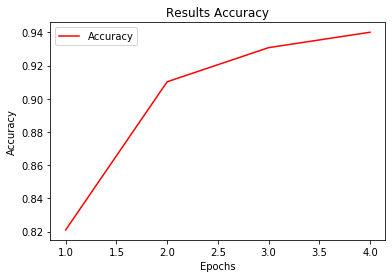

In [23]:
#Точность с каждой эпохой растет

plt.clf()
plt.plot(epochs, acc, 'r', label = 'Accuracy')
plt.title('Results Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [24]:
my_review = 'verybad'
alph = 'abcdefghijklmnoprstuvwxyz'
word_index = {'a' : 1}

for i in range(len(alph)):
    word_index[alph[i]] = i+1

word_index

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [127]:
my_review = 'verybad'
temp = list(my_review)
for i in range(len(my_review)):
    temp[i] = word_index[temp[i]]
temp

my_review = ''
for i in temp:
    my_review = my_review + str(i)
    
temp

[21, 5, 17, 24, 2, 1, 4]

In [135]:
temp_arr = [temp]
arr =np.zeros((10000, 7))
for i in range(1,10000):
    arr[i] = temp

In [138]:
type(arr[0])

numpy.ndarray

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_temp = vectorize_sequences(temp_arr)
x_temp

In [140]:
model.predict(arr)

ValueError: Error when checking input: expected dense_4_input to have shape (10000,) but got array with shape (7,)

 Обычно исходные данные приходится подвергать некоторой предварительной обработке, чтобы передать их в нейронную сеть в виде тензоров. Последовательности слов можно преобразовать в бинарные векторы, но существуют также другие варианты. 
 Стек слоев Dense с функцией активации relu способен решать широкий круг задач (включая классификацию эмоциональной окраски), и вы, вероятно, чаще всего будете использовать именно эту комбинацию. 
 В задаче бинарной классификации (с двумя выходными классами) в конце вашей нейросети должен находиться слой Dense с одним нейроном и функцией активации sigmoid: результатом работы сети должно быть скалярное значение в диапазоне между 0 и 1, представляющее собой вероятность. 
 С таким скалярным результатом, получаемым с помощью сигмоидной функции, в задачах бинарной классификации следует использовать функцию потерь binary_crossentropy. 
 В общем случае оптимизатор rmsprop является наиболее подходящим выбором для любого типа задач. Одной головной болью меньше для вас. 
 По мере улучшения на обучающих данных нейронные сети рано или поздно начинают переобучаться, демонстрируя ухудшение результатов на данных, которые они прежде не видели. Поэтому всегда контролируйте качество работы сети на данных не из обучающего набора. 